In [56]:
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras import models, layers, regularizers
import cv2
import numpy as np
from sklearn.metrics import accuracy_score
from collections import Counter

In [57]:
train_path='c:/Users/hi019012/Desktop/chest-xray-pneumonia/chest_xray/train' 
test_path='c:/Users/hi019012/Desktop/chest-xray-pneumonia/chest_xray/test'
val_path='c:/Users/hi019012/Desktop/chest-xray-pneumonia/chest_xray/val' 

In [58]:
def plot_images(img_dir, top=10):
    all_img_dirs = os.listdir(img_dir)
    img_files = [os.path.join(img_dir, file) for file in all_img_dirs][:5]
    plt.figure(figsize=(10, 10))  
    for idx, img_path in enumerate(img_files):
        plt.subplot(5, 5, idx+1)
        img = plt.imread(img_path)
        plt.tight_layout()        
        plt.axis('off')
        plt.imshow(img, cmap='gray') 

# PLOT DATA

## Function Plot Image

In [59]:
def plot_images(img_dir, top=10):
    all_img_dirs = os.listdir(img_dir)
    img_files = [os.path.join(img_dir, file) for file in all_img_dirs][:5]
    plt.figure(figsize=(10, 10))  
    for idx, img_path in enumerate(img_files):
        plt.subplot(5, 5, idx+1)
        img = plt.imread(img_path)
        plt.tight_layout()        
        plt.axis('off')
        plt.imshow(img, cmap='gray') 

## Normal Label 

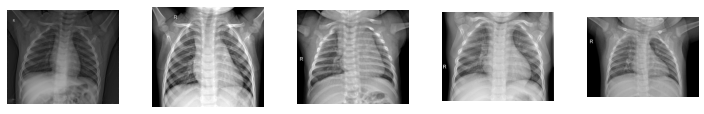

In [60]:
plot_images(train_path+'/NORMAL')

## Pneumonia Lable

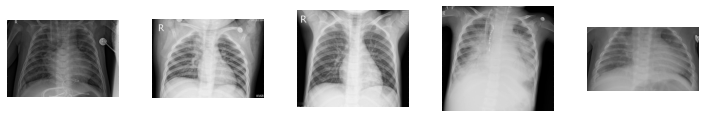

In [61]:
plot_images(train_path+'/PNEUMONIA')

## PLot Bar chart Diagram "Counter Label Data"

In [62]:
def plot_bar_chart_diagram(path_data):
  dic={}
  for emotion in  os.listdir(path_data):
    dem=0
    for x in os.listdir(path_data+"/"+emotion):
      dem+=1
    dic[emotion]=dem
  print(dic)
  barlist=plt.bar(range(len(dic)), list(dic.values()),tick_label=list(dic.keys()))
#set color
  plt.show()

### Data Training Diagram

{'PNEUMONIA': 3875, 'NORMAL': 1341}


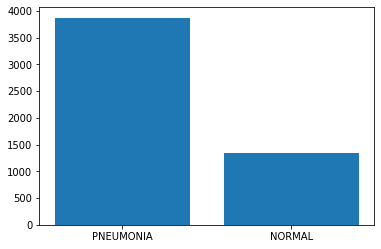

In [63]:
plot_bar_chart_diagram(train_path)

### Data Testing Diagram 

{'PNEUMONIA': 390, 'NORMAL': 234}


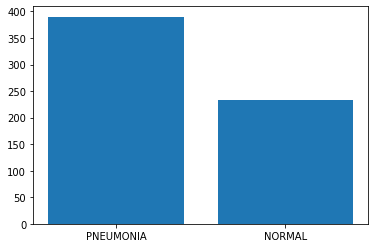

In [64]:
plot_bar_chart_diagram(test_path)

# Data Generator

In [65]:
batch_size = 32
target_size = (116,82)

train_datagen = ImageDataGenerator(rescale=1./255.0,
                                   validation_split=0.3,
                                   zoom_range=0.8,
                                  horizontal_flip=True,
                
                                  )
test_datagen=ImageDataGenerator(rescale = 1./255.0)

train_generator = train_datagen.flow_from_directory(
        train_path,
        target_size=target_size,
        batch_size=batch_size,
        subset="training",
        class_mode='binary')

val_generator = train_datagen.flow_from_directory(
        train_path,
        target_size=target_size,
        batch_size=batch_size,
        subset="validation",
        class_mode='binary')
test_generator=test_datagen.flow_from_directory(
        test_path,
        target_size=target_size,
        class_mode='binary',
        batch_size=batch_size,
        shuffle=False)

Found 3652 images belonging to 2 classes.
Found 1564 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


# Training Model By CNN

## Build Model CNN

In [66]:
input_shape = (116,82,3) # img_rows, img_colums, color_channels

In [67]:
# Build Model
model = models.Sequential()

model.add(layers.Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(layers.Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(layers.Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(256, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(layers.Conv2D(256, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(512, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(layers.Conv2D(512, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(layers.Dropout(0.25))

model.add(layers.Flatten())

model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 114, 80, 64)       1792      
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 114, 80, 64)       36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 57, 40, 64)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 57, 40, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 57, 40, 128)       73856     
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 57, 40, 128)       147584    
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 28, 20, 128)      


<p style="background-color:#252629;font-family:avenir next;color:#F1F3F4;font-size:200%;text-align:center;border-radius:25px 25px;">Plot Model</p>

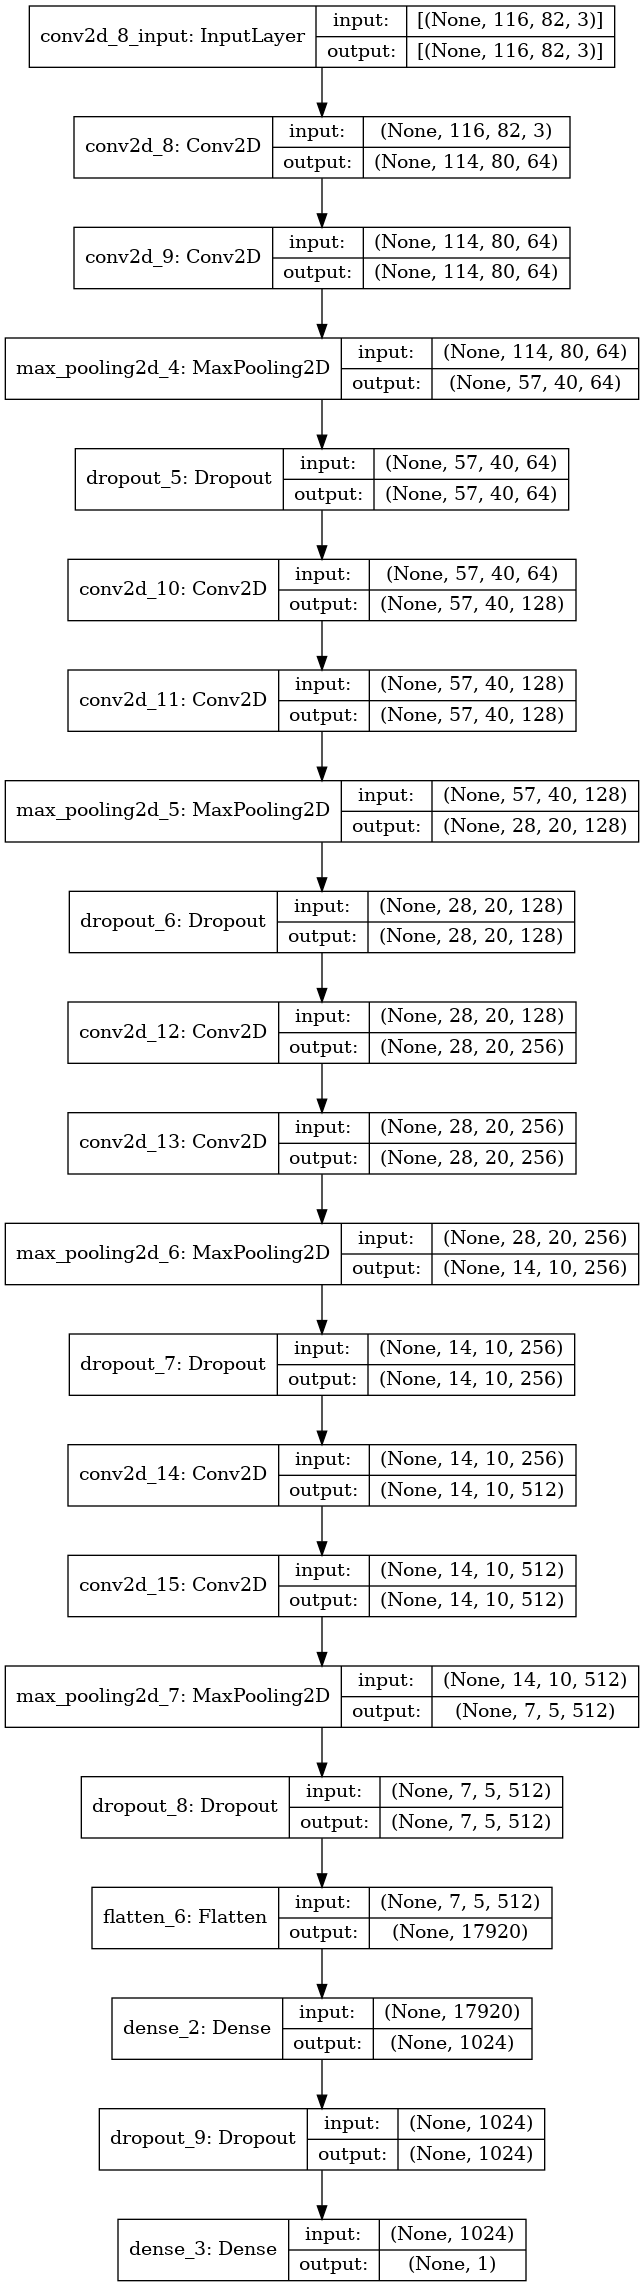

In [68]:
# Compile Model
plot_model(model, to_file='model_1.png', show_shapes=True, show_layer_names=True)

## Compile Model

In [69]:
# Compile Model
model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam( learning_rate=0.0001), metrics=['accuracy'],) 

## Training Model 

In [70]:
earlystop =tf.keras.callbacks.EarlyStopping(monitor='val_loss', 
                          min_delta=0, 
                          patience=10, 
                          verbose=1, 
                          restore_best_weights=True)
                        
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', 
                              factor=0.5, 
                              patience=6, 
                              verbose=1, 
                              min_delta=0.0001)
# checkpoint=tf.keras.callbacks.ModelCheckpoint(
#      checkpoint_path, verbose=1, save_weights_only=True,
#     period=5
# )
weight_for_0 = (1.0 / 1341)*(5216/2.0)
weight_for_1 = (1.0 / 3875)*(5216/2.0)
print(weight_for_0,weight_for_1)
class_weight = {0: weight_for_0, 1: weight_for_1}
callback=[earlystop,reduce_lr]
history = model.fit(train_generator, epochs=100 ,verbose=1, validation_data=val_generator,callbacks=callback,class_weight=class_weight,)

1.9448173005219984 0.6730322580645162
Epoch 1/100
115/115 [==============================] - 62s 532ms/step - loss: 0.6934 - accuracy: 0.4244 - val_loss: 0.6847 - val_accuracy: 0.7430
Epoch 2/100
115/115 [==============================] - 60s 526ms/step - loss: 0.6882 - accuracy: 0.5608 - val_loss: 0.6606 - val_accuracy: 0.7487
Epoch 3/100
115/115 [==============================] - 60s 525ms/step - loss: 0.5743 - accuracy: 0.7087 - val_loss: 0.4699 - val_accuracy: 0.7986
Epoch 4/100
115/115 [==============================] - 60s 522ms/step - loss: 0.4281 - accuracy: 0.8160 - val_loss: 0.3831 - val_accuracy: 0.8363
Epoch 5/100
115/115 [==============================] - 60s 523ms/step - loss: 0.3894 - accuracy: 0.8330 - val_loss: 0.3564 - val_accuracy: 0.8370
Epoch 6/100
115/115 [==============================] - 60s 527ms/step - loss: 0.3605 - accuracy: 0.8486 - val_loss: 0.4051 - val_accuracy: 0.8165
Epoch 7/100
115/115 [==============================] - 61s 533ms/step - loss: 0.3349 -

In [71]:
models.save_model(model ,'./Diagnose_Pneumoinia.h5') 

## Evaluate Model 

In [72]:
score = model.evaluate(val_generator) 
print('Test loss: ', score[0])
print('Test accuracy: ', score[1])

49/49 [==============================] - 18s 375ms/step - loss: 0.1904 - accuracy: 0.9271
Test loss:  0.19038328528404236
Test accuracy:  0.927109956741333


In [73]:
score = model.evaluate(train_generator) 
print('Test loss: ', score[0])
print('Test accuracy: ', score[1])

115/115 [==============================] - 41s 355ms/step - loss: 0.1598 - accuracy: 0.9348
Test loss:  0.1598278135061264
Test accuracy:  0.9348302483558655


In [74]:
score = model.evaluate(test_generator) 
print('Test loss: ', score[0])
print('Test accuracy: ', score[1])

20/20 [==============================] - 5s 226ms/step - loss: 0.2198 - accuracy: 0.9183
Test loss:  0.2197771817445755
Test accuracy:  0.9182692170143127


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


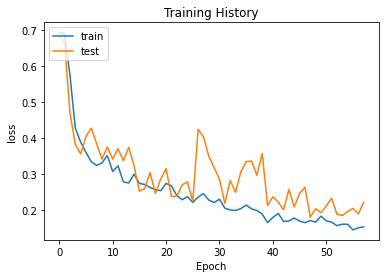

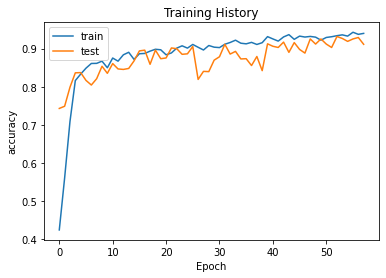

In [75]:
# Show Train History
keys=history.history.keys()
print(keys)

def show_train_history(hisData,train,test): 
    plt.plot(hisData.history[train])
    plt.plot(hisData.history[test])
    plt.title('Training History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

show_train_history(history, 'loss', 'val_loss')
show_train_history(history, 'accuracy', 'val_accuracy')

              precision    recall  f1-score   support

      NORMAL       0.91      0.87      0.89       234
   PNEUMONIA       0.92      0.95      0.94       390

    accuracy                           0.92       624
   macro avg       0.92      0.91      0.91       624
weighted avg       0.92      0.92      0.92       624



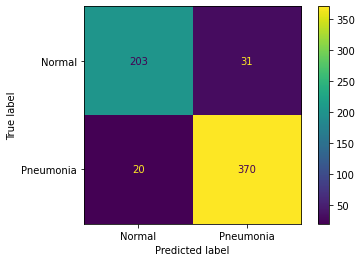

In [76]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,ConfusionMatrixDisplay
y_pred = np.round(model.predict(test_generator))
y_true = test_generator.classes
y_labels = list(test_generator.class_indices.keys())
display(ConfusionMatrixDisplay(confusion_matrix(y_true, y_pred), display_labels=['Normal', 'Pneumonia']).plot())
print(classification_report(y_true, y_pred, target_names=y_labels))

# Training Model By Convolution Layer+SVM(final Layer) 

In [77]:
from keras.applications.vgg16 import VGG16 
# load the pretrained model 
layer_input = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)
layer_input.trainable=False
# extract features 
model_pre = models.Sequential()
model_pre.add( layer_input)
model_pre.add(layers.Flatten())

In [78]:
X_train= model_pre.predict(train_generator) 
y_train=train_generator.classes

In [79]:
print(X.shape)
print(Y.shape)

(3652, 3072)
(3652,)


In [80]:
from sklearn.svm import SVC
clf_SVM=SVC(C=100,kernel='rbf',class_weight='balanced')
clf_SVM.fit(X,Y)

SVC(C=100, class_weight='balanced')

              precision    recall  f1-score   support

           0       0.72      0.93      0.81       939
           1       0.97      0.87      0.92      2713

    accuracy                           0.89      3652
   macro avg       0.85      0.90      0.87      3652
weighted avg       0.91      0.89      0.89      3652



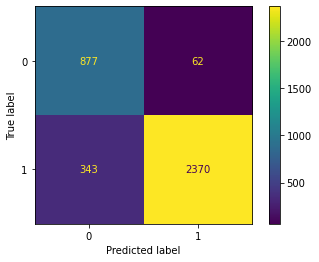

In [81]:
from sklearn.metrics import classification_report, plot_confusion_matrix,plot_roc_curve
print (classification_report(Y,clf_SVM.predict(X)))
plot_confusion_matrix(clf_SVM,X,Y)

In [82]:
X_test=model_pre.predict(test_generator)
Y_test=test_generator.classes

              precision    recall  f1-score   support

           0       0.33      0.20      0.25       234
           1       0.61      0.76      0.68       390

    accuracy                           0.55       624
   macro avg       0.47      0.48      0.46       624
weighted avg       0.51      0.55      0.52       624



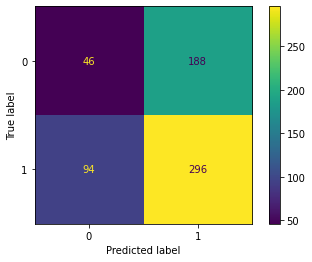

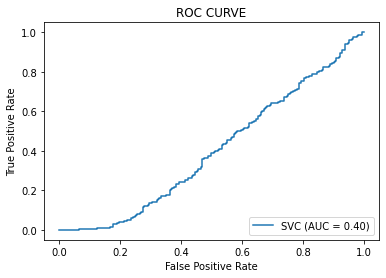

In [83]:
from sklearn.metrics import classification_report, plot_confusion_matrix,plot_roc_curve
print (classification_report(Y_test,clf_SVM.predict(X_test)))
plot_confusion_matrix(clf_SVM,X_test,Y_test)
fig=plot_roc_curve(clf_SVM,X_test,Y_test)
plt.title("ROC CURVE")
plt.show()